In [4]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib.request as req
import seaborn as sns

In [3]:
plt.ion
print(mpl.is_interactive())


False


In [7]:
#using pandas library and 'read_csv' function to read NY csv file as file 
airbnb=pd.read_csv("/Users/tramduong/Downloads/ML4B/AB_NYC_2019.csv")

In [8]:
#drop collums
airbnb.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)

In [9]:
print(airbnb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [10]:
#ersetzen alle null reviews_per_month mit 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)

In [11]:
print(airbnb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [12]:
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


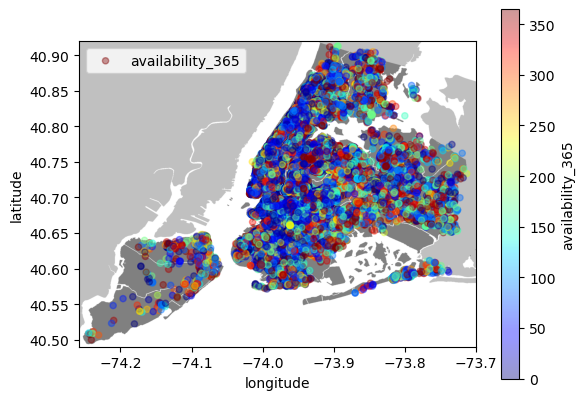

In [13]:
#STAR EXPLORING THE DATA FROM HERE

#creating a sub-dataframe with no extreme values / less than 500
sub_6=airbnb[airbnb.price < 500]

#Scatterplot for avability
fname = "local-filename.png"

link = "https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG"

req.urlretrieve(link, fname)

#x = airbnb[airbnb.longitude]
#y = airbnb[airbnb.latitude]

#plt.scatter(x, y, zorder=1)

img = plt.imread(fname)

ext = [-74.258, -73.7, 40.49, 40.92]

plt.imshow(img, zorder = 0, extent = ext)

ax = plt.gca()

sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='availability_365', ax=ax, cmap= 'jet',
           colorbar=True, alpha=0.4, zorder=5)
#sns.scatterplot(x=airbnb.longitude, y=airbnb.latitude, hue = airbnb.neighbourhood_group, zorder= 6)

plt.legend()
plt.show()



In [14]:
top_20_price = airbnb.nlargest(20,'price')
print(top_20_price)

                                                    name    host_id  \
9151                 Furnished room in Astoria apartment   20582832   
17692    Luxury 1 bedroom apt. -stunning Manhattan views    5143901   
29238                                1-BR Lincoln Center   72390391   
6530                                  Spanish Harlem Apt    1235070   
12342                Quiet, Clean, Lit @ LES & Chinatown    3906464   
40433  2br - The Heart of NYC: Manhattans Lower East ...    4382127   
30268  Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho   18128455   
4377                                       Film Location    1177497   
29662          East 72nd Townhouse by (Hidden by Airbnb)  156158778   
42523                70' Luxury MotorYacht on the Hudson    7407743   
45666                               Gem of east Flatbush  262534951   
44034                   3000 sq ft daylight photo studio    3750764   
3774                    SUPER BOWL Brooklyn Duplex Apt!!   11598359   
37194 

In [15]:
count_top_20_price = top_20_price.neighbourhood_group.value_counts()
print(count_top_20_price)

Manhattan    15
Brooklyn      4
Queens        1
Name: neighbourhood_group, dtype: int64


In [16]:
label = 'Manhattan', 'Brooklyn', 'Queen'

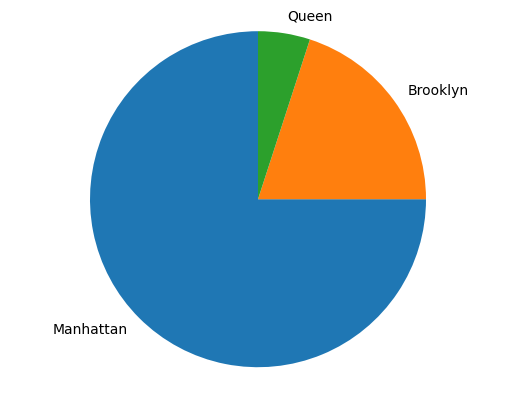

In [17]:
fig1, ax1 = plt.subplots()
patches = ax1.pie(count_top_20_price,labels=label, startangle= 90)
ax1.axis('equal')

plt.show()